In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

from sklearn.feature_selection import RFECV, VarianceThreshold
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_validate
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

random_state = 42
from train_test_split import *
from IPython.display import display

In [2]:
def load_data(path):

    return pd.read_csv(path,index_col=False)

load_data('./validation/validation.csv')

X_valid = load_data('./validation/validation.csv').copy()

X_valid

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
0,104296,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,0.000957,0.000914,0.001914,-0.000043,0.000990,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
1,82999,-9.536743e-07,0.000010,0.000027,0.000006,0.000010,0.000100,-0.000020,0.000036,-0.000043,...,0.000024,0.000077,0.000044,0.000024,-0.000023,-0.000010,0.000010,-0.000010,-9.536743e-07,Escherichia_coli
2,171375,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,0.000914,-0.000043,-0.000086,0.002914,0.001957,0.000990,-0.000010,0.000990,-9.536743e-07,Campylobacter_jejuni
3,138702,-9.536743e-07,0.000010,0.000027,0.000046,0.000170,0.000330,0.000070,0.000116,-0.000033,...,0.000034,0.000057,0.000054,0.000024,-0.000033,-0.000010,0.000020,-0.000010,-9.536743e-07,Klebsiella_pneumoniae
4,139949,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,167622,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,...,0.000914,-0.000043,-0.000086,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Bacteroides_fragilis
19996,29555,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,0.001914,0.000957,0.000914,0.001914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Enterococcus_hirae
19997,31230,-9.536743e-07,-0.000006,-0.000021,-0.000069,-0.000113,-0.000146,-0.000115,-0.000066,-0.000022,...,0.000495,0.000302,0.000480,0.000594,0.000352,0.000070,0.000101,0.000083,1.046326e-06,Streptococcus_pyogenes
19998,194075,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Escherichia_fergusonii


In [3]:
def select_target(df):
    return df['target']

y_train = select_target(X_valid)

In [4]:
def select_features(df):
    return df.drop('target',axis=1)
X_train = select_features(X_valid)
X_train

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,...,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
0,104296,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000043,-0.000086,0.000957,0.000914,0.001914,-0.000043,0.000990,-0.000010,-0.000010,-9.536743e-07
1,82999,-9.536743e-07,0.000010,0.000027,0.000006,0.000010,0.000100,-0.000020,0.000036,-0.000043,...,0.000017,0.000024,0.000077,0.000044,0.000024,-0.000023,-0.000010,0.000010,-0.000010,-9.536743e-07
2,171375,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000043,0.000914,-0.000043,-0.000086,0.002914,0.001957,0.000990,-0.000010,0.000990,-9.536743e-07
3,138702,-9.536743e-07,0.000010,0.000027,0.000046,0.000170,0.000330,0.000070,0.000116,-0.000033,...,0.000037,0.000034,0.000057,0.000054,0.000024,-0.000033,-0.000010,0.000020,-0.000010,-9.536743e-07
4,139949,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,167622,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,...,-0.000043,0.000914,-0.000043,-0.000086,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07
19996,29555,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000043,0.001914,0.000957,0.000914,0.001914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07
19997,31230,-9.536743e-07,-0.000006,-0.000021,-0.000069,-0.000113,-0.000146,-0.000115,-0.000066,-0.000022,...,0.000165,0.000495,0.000302,0.000480,0.000594,0.000352,0.000070,0.000101,0.000083,1.046326e-06
19998,194075,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07


In [5]:
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_)

[0.00176465 0.00091314 0.00131343 0.00109592 0.00167704 0.00354833
 0.00492293 0.00405923 0.0020521  0.00097874 0.00067739 0.00153425
 0.00161456 0.00130953 0.00213519 0.00387856 0.00684147 0.00606597
 0.00362733 0.0020392  0.00145996 0.00121717 0.00080171 0.00112113
 0.00247714 0.00507455 0.00576137 0.00490129 0.00372772 0.00141643
 0.00097113 0.00107718 0.00199476 0.00323362 0.00409379 0.00356849
 0.00342533 0.00146433 0.00096919 0.00183743 0.00313941 0.00303768
 0.00355507 0.0031595  0.00209719 0.00086898 0.00310934 0.00366695
 0.00325781 0.00280538 0.00277305 0.00125227 0.00293591 0.00338585
 0.00338287 0.0022939  0.00136164 0.0023978  0.00347221 0.00313729
 0.00179195 0.00218456 0.00296413 0.00275336 0.00274939 0.00168328
 0.00123333 0.00185952 0.00134358 0.00211576 0.00550565 0.00535411
 0.0066861  0.00440003 0.00186213 0.00087232 0.00127334 0.00077435
 0.00201667 0.00401642 0.0070805  0.00820871 0.00758422 0.0037871
 0.00135066 0.00092461 0.00101462 0.00309645 0.00514805 0.00928

### PLOT LARGEST SCORE VALUE TO SELECT VARIABLES

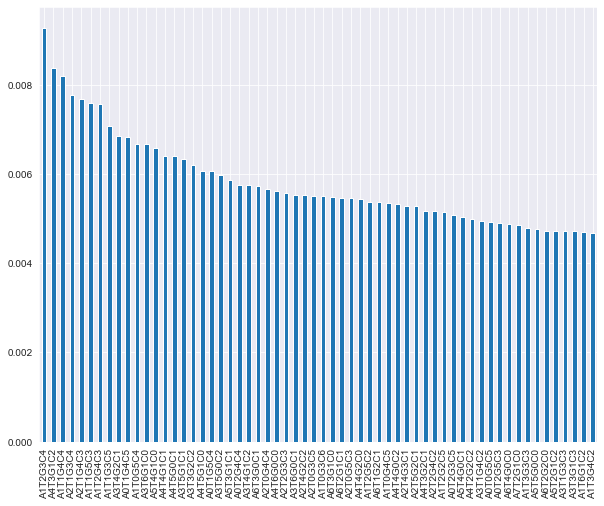

60 : Index(['A1T2G3C4', 'A4T3G1C2', 'A1T1G4C4', 'A2T1G3C4', 'A2T1G4C3', 'A1T1G5C3',
       'A1T2G4C3', 'A1T1G3C5', 'A3T4G2C1', 'A0T1G4C5', 'A1T0G5C4', 'A3T6G1C0',
       'A5T4G1C0', 'A4T4G1C1', 'A4T5G0C1', 'A3T5G1C1', 'A3T3G2C2', 'A4T5G1C0',
       'A0T1G5C4', 'A3T5G0C2', 'A5T3G1C1', 'A0T2G4C4', 'A3T4G1C2', 'A6T3G0C1',
       'A2T0G4C4', 'A4T6G0C0', 'A2T2G3C3', 'A3T6G0C1', 'A2T4G2C2', 'A2T0G3C5',
       'A1T0G3C6', 'A6T3G1C0', 'A6T2G1C1', 'A2T0G5C3', 'A4T4G2C0', 'A1T2G5C2',
       'A6T1G2C1', 'A1T0G4C5', 'A4T4G0C2', 'A2T4G3C1', 'A2T5G2C1', 'A4T3G2C1',
       'A2T2G4C2', 'A1T2G2C5', 'A0T2G3C5', 'A5T4G0C1', 'A4T2G2C2', 'A3T1G4C2',
       'A0T0G5C5', 'A0T2G5C3', 'A6T4G0C0', 'A7T2G1C0', 'A1T3G3C3', 'A5T5G0C0',
       'A6T2G2C0', 'A5T2G1C2', 'A3T1G3C3', 'A3T3G1C3', 'A1T6G1C2', 'A1T3G4C2'],
      dtype='object')


In [6]:
'''
for i in range(20,101,10):
    plt.figure(figsize=(10,8))
    feat_importances = pd.Series(model.feature_importances_,index=X_train.columns)
    feat_importances.nlargest(i).plot(kind='bar')

    plt.show()
    print(i,":", feat_importances.nlargest(i).index)
'''

plt.figure(figsize=(10,8))
feat_importances = pd.Series(model.feature_importances_,index=X_train.columns)
feat_importances.nlargest(60).plot(kind='bar')

plt.show()
print(60,":", feat_importances.nlargest(60).index)

### PLOT BOX PLOT

In [262]:
# boxplot_data = X_train.copy()
selected_features = ['A1T1G4C4', 'A1T2G3C4', 'A2T1G4C3', 'A4T5G1C0', 'A1T2G4C3', 'A2T1G3C4',
       'A1T1G5C3', 'A3T5G1C1', 'A1T1G3C5', 'A0T1G5C4', 'A2T0G4C4', 'A1T0G5C4',
       'A3T6G1C0', 'A4T4G0C2', 'A2T2G3C3', 'A3T6G0C1', 'A6T3G0C1', 'A1T2G2C5',
       'A3T3G2C2', 'A3T4G2C1', 'A5T2G1C2', 'A4T5G0C1', 'A1T0G4C5', 'A5T4G0C1',
       'A0T1G3C6', 'A6T3G1C0', 'A2T0G3C5', 'A1T3G3C3', 'A0T2G4C4', 'A4T4G2C0',
       'A0T2G3C5', 'A5T4G1C0', 'A4T3G1C2', 'A4T4G1C1', 'A3T1G2C4', 'A2T4G3C1',
       'A2T1G5C2', 'A3T1G4C2', 'A4T3G2C1', 'A6T1G2C1', 'A3T4G1C2', 'A0T1G4C5',
       'A4T6G0C0', 'A1T0G3C6', 'A1T5G1C3', 'A3T5G2C0', 'A2T5G1C2', 'A4T2G2C2',
       'A1T4G2C3', 'A7T2G1C0', 'A2T5G2C1', 'A2T7G0C1', 'A7T1G2C0', 'A2T0G5C3',
       'A2T1G2C5', 'A0T2G5C3', 'A3T3G1C3', 'A3T3G3C1', 'A6T2G1C1', 'A5T3G2C0']

# boxplot_data[selected_features] = np.log(boxplot_data[selected_features])
# boxplot_data.boxplot(column=selected_features)
# plt.ylabel(selected_features)
# plt.title(selected_features)
# plt.show()
'''
for feature in selected_features:
       # boxplot_data[feature]=np.log(boxplot_data[feature])
       original_train_data.boxplot(column=feature)
       plt.ylabel(feature)
       plt.title(feature)
       plt.show()
'''

'\nfor feature in selected_features:\n       # boxplot_data[feature]=np.log(boxplot_data[feature])\n       original_train_data.boxplot(column=feature)\n       plt.ylabel(feature)\n       plt.title(feature)\n       plt.show()\n'

### REMOVING OUTLIERS FROM THE BOXPLOT

In [8]:
# boxplot_data = X_train.copy()
selected_features = ['A1T1G4C4', 'A1T2G3C4', 'A2T1G4C3', 'A4T5G1C0', 'A1T2G4C3', 'A2T1G3C4',
       'A1T1G5C3', 'A3T5G1C1', 'A1T1G3C5', 'A0T1G5C4', 'A2T0G4C4', 'A1T0G5C4',
       'A3T6G1C0', 'A4T4G0C2', 'A2T2G3C3', 'A3T6G0C1', 'A6T3G0C1', 'A1T2G2C5',
       'A3T3G2C2', 'A3T4G2C1', 'A5T2G1C2', 'A4T5G0C1', 'A1T0G4C5', 'A5T4G0C1',
       'A0T1G3C6', 'A6T3G1C0', 'A2T0G3C5', 'A1T3G3C3', 'A0T2G4C4', 'A4T4G2C0',
       'A0T2G3C5', 'A5T4G1C0', 'A4T3G1C2', 'A4T4G1C1', 'A3T1G2C4', 'A2T4G3C1',
       'A2T1G5C2', 'A3T1G4C2', 'A4T3G2C1', 'A6T1G2C1', 'A3T4G1C2', 'A0T1G4C5',
       'A4T6G0C0', 'A1T0G3C6', 'A1T5G1C3', 'A3T5G2C0', 'A2T5G1C2', 'A4T2G2C2',
       'A1T4G2C3', 'A7T2G1C0', 'A2T5G2C1', 'A2T7G0C1', 'A7T1G2C0', 'A2T0G5C3',
       'A2T1G2C5', 'A0T2G5C3', 'A3T3G1C3', 'A3T3G3C1', 'A6T2G1C1', 'A5T3G2C0']

# # boxplot_data[selected_features] = np.log(boxplot_data[selected_features])
# # boxplot_data.boxplot(column=selected_features)
# # plt.ylabel(selected_features)
# # plt.title(selected_features)
# # plt.show()
dataset = load_data('./validation/validation.csv')

for feature in feat_importances.nlargest(60).index:
    
    q1 = dataset[feature].quantile(0.25)
    q3 = dataset[feature].quantile(0.75)
    IQR = q3-q1
    lower_extreme = q1 - 1.5*IQR
    upper_extreme = q3 + 1.5*IQR

    out1 = dataset[(dataset[feature]<lower_extreme)].index
    out2 = dataset[(dataset[feature]>upper_extreme)].index

    dataset.drop(out1,inplace=True)
    dataset.drop(out2,inplace=True)
    

#     boxplot_data[feature].replace(out1,mean,inplace=True)
#     boxplot_data[feature].replace(out2,mean,inplace=True)
    
    #boxplot_data[feature]=np.log(boxplot_data[feature])
    '''
    original_train_data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()
'''

In [9]:
dataset

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
1,82999,-9.536743e-07,0.000010,0.000027,0.000006,0.000010,0.000100,-0.000020,0.000036,-0.000043,...,0.000024,0.000077,0.000044,0.000024,-0.000023,-0.000010,0.000010,-0.000010,-9.536743e-07,Escherichia_coli
3,138702,-9.536743e-07,0.000010,0.000027,0.000046,0.000170,0.000330,0.000070,0.000116,-0.000033,...,0.000034,0.000057,0.000054,0.000024,-0.000033,-0.000010,0.000020,-0.000010,-9.536743e-07,Klebsiella_pneumoniae
10,53707,-9.536743e-07,-0.000009,-0.000037,-0.000096,-0.000169,-0.000209,-0.000171,-0.000102,-0.000041,...,0.000513,0.000426,0.000441,0.000800,0.000378,0.000065,0.000124,0.000093,1.046326e-06,Streptococcus_pneumoniae
13,19759,-9.536743e-07,-0.000007,-0.000009,0.000025,0.000040,-0.000002,0.000022,0.000032,-0.000009,...,0.000119,0.000054,0.000159,0.000147,0.000119,0.000015,0.000011,0.000030,4.632568e-08,Escherichia_fergusonii
16,64789,-9.536743e-07,-0.000010,-0.000041,-0.000109,-0.000194,-0.000239,-0.000197,-0.000112,-0.000042,...,0.001317,0.000872,0.001266,0.001604,0.000883,0.000241,0.000334,0.000316,5.046326e-06,Enterococcus_hirae
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19988,82194,-9.536743e-07,-0.000010,-0.000042,-0.000108,-0.000193,-0.000238,-0.000193,-0.000110,-0.000039,...,0.001307,0.000876,0.001308,0.001607,0.000918,0.000228,0.000327,0.000305,9.046326e-06,Enterococcus_hirae
19991,108144,1.046326e-06,-0.000009,-0.000037,-0.000073,-0.000138,-0.000179,-0.000147,-0.000076,-0.000037,...,0.000487,0.000431,0.000448,0.000707,0.000354,0.000075,0.000094,0.000103,4.632568e-08,Bacteroides_fragilis
19993,89800,-9.536743e-07,-0.000007,-0.000029,-0.000075,-0.000122,-0.000156,-0.000131,-0.000075,-0.000029,...,0.000396,0.000353,0.000340,0.000619,0.000299,0.000045,0.000080,0.000088,5.046326e-06,Streptococcus_pneumoniae
19997,31230,-9.536743e-07,-0.000006,-0.000021,-0.000069,-0.000113,-0.000146,-0.000115,-0.000066,-0.000022,...,0.000495,0.000302,0.000480,0.000594,0.000352,0.000070,0.000101,0.000083,1.046326e-06,Streptococcus_pyogenes


In [10]:
def modified_dataset():
    selected_columns = feat_importances.nlargest(60).index
    df = pd.DataFrame(dataset,columns=selected_columns)
    df['target'] = dataset['target']
    return df
    
new_df = modified_dataset()
new_df

,A1T2G3C4,A4T3G1C2,A1T1G4C4,A2T1G3C4,A2T1G4C3,A1T1G5C3,A1T2G4C3,A1T1G3C5,A3T4G2C1,A0T1G4C5,...,A7T2G1C0,A1T3G3C3,A5T5G0C0,A6T2G2C0,A5T2G1C2,A3T1G3C3,A3T3G1C3,A1T6G1C2,A1T3G4C2,target
1,0.000694,-0.000216,0.000342,-0.000176,0.000334,-0.000127,0.000794,0.000103,-0.000496,0.000098,...,0.000027,-0.000532,0.000080,0.000078,0.000060,0.000098,-0.000722,-0.000083,0.000084,Escherichia_coli
3,0.001074,-0.000526,0.001282,0.000424,0.000844,0.000663,0.001344,0.001013,-0.000856,0.000458,...,-0.000013,-0.000492,0.000040,-0.000072,-0.000300,0.000338,-0.000952,-0.000163,-0.000036,Klebsiella_pneumoniae
10,-0.007842,0.005237,-0.004711,-0.007750,-0.007812,-0.003784,-0.007667,-0.003755,0.005081,-0.001003,...,0.001779,-0.007225,0.000785,0.002994,0.004339,-0.007205,0.001487,0.003585,-0.004989,Streptococcus_pneumoniae
13,0.000632,-0.001316,0.000760,0.001089,0.000624,0.000616,0.001280,0.000593,-0.001143,0.000143,...,0.000388,0.000495,0.000217,0.000365,0.000062,0.000378,-0.002114,0.000794,0.000641,Escherichia_fergusonii
16,-0.009729,0.006781,-0.005489,-0.009749,-0.009757,-0.004341,-0.009761,-0.004377,0.007174,-0.001146,...,0.003015,-0.010133,0.001177,0.004501,0.007355,-0.009949,0.000448,0.006108,-0.007084,Enterococcus_hirae
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19988,-0.009654,0.006964,-0.005500,-0.009747,-0.009805,-0.004372,-0.009693,-0.004337,0.007081,-0.001148,...,0.002981,-0.009961,0.001177,0.004335,0.007377,-0.009864,0.000446,0.006084,-0.007132,Enterococcus_hirae
19991,-0.004861,0.001929,-0.003306,-0.004978,-0.004939,-0.002499,-0.004987,-0.002459,0.001842,-0.000719,...,0.001595,-0.004401,0.000870,0.002541,0.002653,-0.004469,-0.000869,0.003351,-0.003529,Bacteroides_fragilis
19993,-0.006290,0.004102,-0.003739,-0.006119,-0.006312,-0.002983,-0.006125,-0.002984,0.004095,-0.000777,...,0.001467,-0.005799,0.000622,0.002484,0.003437,-0.005735,0.001179,0.002910,-0.003895,Streptococcus_pneumoniae
19997,-0.005731,0.004982,-0.003448,-0.005739,-0.005920,-0.002745,-0.005742,-0.002768,0.004876,-0.000706,...,0.001320,-0.005681,0.000672,0.002171,0.004217,-0.005607,0.001209,0.002730,-0.003992,Streptococcus_pyogenes


In [11]:
def ohe():
    return pd.get_dummies(new_df)

ohe_data = ohe()

In [12]:
ohe_data

,A1T2G3C4,A4T3G1C2,A1T1G4C4,A2T1G3C4,A2T1G4C3,A1T1G5C3,A1T2G4C3,A1T1G3C5,A3T4G2C1,A0T1G4C5,...,target_Bacteroides_fragilis,target_Campylobacter_jejuni,target_Enterococcus_hirae,target_Escherichia_coli,target_Escherichia_fergusonii,target_Klebsiella_pneumoniae,target_Salmonella_enterica,target_Staphylococcus_aureus,target_Streptococcus_pneumoniae,target_Streptococcus_pyogenes
1,0.000694,-0.000216,0.000342,-0.000176,0.000334,-0.000127,0.000794,0.000103,-0.000496,0.000098,...,0,0,0,1,0,0,0,0,0,0
3,0.001074,-0.000526,0.001282,0.000424,0.000844,0.000663,0.001344,0.001013,-0.000856,0.000458,...,0,0,0,0,0,1,0,0,0,0
10,-0.007842,0.005237,-0.004711,-0.007750,-0.007812,-0.003784,-0.007667,-0.003755,0.005081,-0.001003,...,0,0,0,0,0,0,0,0,1,0
13,0.000632,-0.001316,0.000760,0.001089,0.000624,0.000616,0.001280,0.000593,-0.001143,0.000143,...,0,0,0,0,1,0,0,0,0,0
16,-0.009729,0.006781,-0.005489,-0.009749,-0.009757,-0.004341,-0.009761,-0.004377,0.007174,-0.001146,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19988,-0.009654,0.006964,-0.005500,-0.009747,-0.009805,-0.004372,-0.009693,-0.004337,0.007081,-0.001148,...,0,0,1,0,0,0,0,0,0,0
19991,-0.004861,0.001929,-0.003306,-0.004978,-0.004939,-0.002499,-0.004987,-0.002459,0.001842,-0.000719,...,1,0,0,0,0,0,0,0,0,0
19993,-0.006290,0.004102,-0.003739,-0.006119,-0.006312,-0.002983,-0.006125,-0.002984,0.004095,-0.000777,...,0,0,0,0,0,0,0,0,1,0
19997,-0.005731,0.004982,-0.003448,-0.005739,-0.005920,-0.002745,-0.005742,-0.002768,0.004876,-0.000706,...,0,0,0,0,0,0,0,0,0,1


In [13]:
def y_target():
    return new_df['target'].values

def X_features():
    return new_df.drop('target',axis=1).values

In [14]:
X = X_features()
y = y_target()

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(5749, 60)
(1438, 60)
(5749,)
(1438,)


In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
X_train = minmax_scaler.fit_transform(X_train)
X_test = minmax_scaler.transform(X_test)

In [18]:
X_train

array([[0.68653717, 0.549375  , 0.495     , ..., 0.57939914, 0.26762246,
        0.58066667],
       [0.85264568, 0.395     , 0.638     , ..., 0.36480687, 0.23416965,
        0.69266667],
       [0.87006028, 0.3653125 , 0.7052    , ..., 0.34234621, 0.22915173,
        0.71026667],
       ...,
       [0.85150703, 0.3605    , 0.6837    , ..., 0.26108727, 0.25937873,
        0.71453333],
       [0.76222371, 0.48125   , 0.558     , ..., 0.45779685, 0.20908005,
        0.60066667],
       [0.88955124, 0.3409375 , 0.7547    , ..., 0.24105866, 0.24575866,
        0.7134    ]])

In [19]:
predictions = 0

log_reg = LogisticRegression(max_iter=100000)
log_reg.fit(X_train,Y_train)

predictions = log_reg.predict(X_test)

In [20]:
score = log_reg.score(X_test,Y_test)

### Score of Logistic Regression with train.csv

In [21]:
score

0.9534075104311543

In [22]:
from sklearn.model_selection import cross_validate
model_cross = LogisticRegression(max_iter=100000)
#cross validate the training set
cv = cross_validate(model_cross, X_train, Y_train, cv=5)

def print_scores(cv):
    #print out cross validation scores
    [print('Crossvalidation fold: {}  Accuracy: {}'.format(n, score)) for n, score in enumerate(cv['test_score'])]
    #print out the mean of the cross validation
    print('Mean train cross validation score {}'.format(cv['test_score'].mean()))
    
print_scores(cv)

Crossvalidation fold: 0  Accuracy: 0.9434782608695652
Crossvalidation fold: 1  Accuracy: 0.9304347826086956
Crossvalidation fold: 2  Accuracy: 0.951304347826087
Crossvalidation fold: 3  Accuracy: 0.9382608695652174
Crossvalidation fold: 4  Accuracy: 0.9451697127937336
Mean train cross validation score 0.9417295947326597


In [23]:
from sklearn.pipeline import make_pipeline
#define the scaler
scaler = MinMaxScaler()

#define the classifier
classifier = LogisticRegression(max_iter=100000)

#make the pipeline
pipe = make_pipeline(scaler, classifier)

#run the cross validation
cv = cross_validate(pipe, X_train, Y_train, cv=5)
#print results
print_scores(cv)

Crossvalidation fold: 0  Accuracy: 0.9443478260869566
Crossvalidation fold: 1  Accuracy: 0.931304347826087
Crossvalidation fold: 2  Accuracy: 0.9521739130434783
Crossvalidation fold: 3  Accuracy: 0.94
Crossvalidation fold: 4  Accuracy: 0.9486510008703221
Mean train cross validation score 0.9432954175653687
